## Corona-Impfungen in Deutschland: Verlauf und Prognose

Neueste Daten laden unter: https://impfdashboard.de/

Detaillierte Datenquellen (Impfungen kumulativ nach Bundesländern und Indikation, werktäglich aktualisiert): https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Daten/Impfquotenmonitoring.html

##### Überblick:
-	Bis Ende Februar sollen in ganz Deutschland 6 Millionen Impfdosen zur Verfügung stehen (https://www.mdr.de/nachrichten/panorama/corona-impfdosen-deutschland-anzahl-100.html)


In [40]:
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import datetime
pd.options.mode.chained_assignment = None

from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [41]:
data = pd.read_csv("germany_vaccinations_timeseries.csv", delimiter=";",header=0)
display(data)

,date,dosen_kumulativ,dosen_differenz_zum_vortag,dosen_biontech_kumulativ,dosen_moderna_kumulativ,personen_erst_kumulativ,personen_voll_kumulativ,impf_quote_erst,impf_quote_voll,indikation_alter_dosen,indikation_beruf_dosen,indikation_medizinisch_dosen,indikation_pflegeheim_dosen,indikation_alter_erst,indikation_beruf_erst,indikation_medizinisch_erst,indikation_pflegeheim_erst,indikation_alter_voll,indikation_beruf_voll,indikation_medizinisch_voll,indikation_pflegeheim_voll
0,27.12.2020,24266,24266,24266,1,24265,1,29,0,6622,8163,977,13630,6611,8163,977,13630,11,0,0,0
1,28.12.2020,44098,19832,44098,0,44097,1,53,0,13663,15733,1685,23493,13652,15733,1685,23493,11,0,0,0
2,29.12.2020,87473,43375,87473,0,87472,1,105,0,24276,37581,2727,40669,24265,37581,2727,40669,11,0,0,0
3,30.12.2020,145393,57920,145393,0,145392,1,175,0,37538,68887,3962,62166,37527,68887,3962,62166,11,0,0,0
4,31.12.2020,183884,38491,183884,0,183883,1,221,0,47780,87541,5516,77786,47769,87541,5516,77786,11,0,0,0
5,01.01.2021,208313,24429,208313,0,208312,1,250,0,53734,97303,6318,90375,53723,97303,6318,90375,11,0,0,0
6,02.01.2021,259523,51210,259523,0,259522,1,312,0,68057,120948,7518,111520,68046,120948,7518,111520,11,0,0,0
7,03.01.2021,284354,24831,284354,0,284353,1,342,0,76025,131723,8187,122400,76014,131723,8187,122400,11,0,0,0
8,04.01.2021,333027,48673,333027,0,333026,1,400,0,88677,156471,10522,138662,88666,156471,10522,138662,11,0,0,0
9,05.01.2021,384129,51102,384129,0,384128,1,462,0,101462,182962,12690,156650,101451,182962,12690,156650,11,0,0,0


### Sämtliche Daten:

In [42]:
pd.to_numeric(data["dosen_differenz_zum_vortag"], errors="coerce")
data["dosen_differenz_zum_vortag"].iloc[0] = 24080
#del data["dosen_differenz_zum_vortag"]
#del data["Unnamed: 21"]
#del data["Unnamed: 22"]
#del data["Unnamed: 23"]
#del data["Unnamed: 24"]
#del data["Unnamed: 25"]
#del data["Unnamed: 26"]
#del data["Unnamed: 27"]
#del data["Unnamed: 28"]
#del data["Unnamed: 29"]
#del data["Unnamed: 30"]
datum = pd.to_datetime(data["date"])
data["date"] = datum
data.dtypes
data["date"] = data["date"].dt.strftime("%d.%m.%y")

In [43]:
days = np.arange(len(data))
impfungen_kumulativ = np.array(data["dosen_kumulativ"])
a = [0]
for i in impfungen_kumulativ:
    a.append(i)
b = np.array(a)
impfungen_kumulativ = np.append(impfungen_kumulativ,b[0])
c = impfungen_kumulativ - b
tägliche_impfungen = c[c>0]

data["tägliche_impfungen"] = tägliche_impfungen
data["tage_seit_impfstart"] = days
pd.options.display.max_columns = None
display(data)
#print(data.dtypes)

,date,dosen_kumulativ,dosen_differenz_zum_vortag,dosen_biontech_kumulativ,dosen_moderna_kumulativ,personen_erst_kumulativ,personen_voll_kumulativ,impf_quote_erst,impf_quote_voll,indikation_alter_dosen,indikation_beruf_dosen,indikation_medizinisch_dosen,indikation_pflegeheim_dosen,indikation_alter_erst,indikation_beruf_erst,indikation_medizinisch_erst,indikation_pflegeheim_erst,indikation_alter_voll,indikation_beruf_voll,indikation_medizinisch_voll,indikation_pflegeheim_voll,tägliche_impfungen,tage_seit_impfstart
0,27.12.20,24266,24080,24266,1,24265,1,29,0,6622,8163,977,13630,6611,8163,977,13630,11,0,0,0,24266,0
1,28.12.20,44098,19832,44098,0,44097,1,53,0,13663,15733,1685,23493,13652,15733,1685,23493,11,0,0,0,19832,1
2,29.12.20,87473,43375,87473,0,87472,1,105,0,24276,37581,2727,40669,24265,37581,2727,40669,11,0,0,0,43375,2
3,30.12.20,145393,57920,145393,0,145392,1,175,0,37538,68887,3962,62166,37527,68887,3962,62166,11,0,0,0,57920,3
4,31.12.20,183884,38491,183884,0,183883,1,221,0,47780,87541,5516,77786,47769,87541,5516,77786,11,0,0,0,38491,4
5,01.01.21,208313,24429,208313,0,208312,1,250,0,53734,97303,6318,90375,53723,97303,6318,90375,11,0,0,0,24429,5
6,01.02.21,259523,51210,259523,0,259522,1,312,0,68057,120948,7518,111520,68046,120948,7518,111520,11,0,0,0,51210,6
7,01.03.21,284354,24831,284354,0,284353,1,342,0,76025,131723,8187,122400,76014,131723,8187,122400,11,0,0,0,24831,7
8,01.04.21,333027,48673,333027,0,333026,1,400,0,88677,156471,10522,138662,88666,156471,10522,138662,11,0,0,0,48673,8
9,01.05.21,384129,51102,384129,0,384128,1,462,0,101462,182962,12690,156650,101451,182962,12690,156650,11,0,0,0,51102,9




### Letzter Tag der Aufzeichnungen:



In [44]:
latest = data.iloc[-1]
print(latest)

date                            25.01.21
dosen_kumulativ                  1921689
dosen_differenz_zum_vortag         88610
dosen_biontech_kumulativ         1891421
dosen_moderna_kumulativ            30311
personen_erst_kumulativ          1638425
personen_voll_kumulativ           283264
impf_quote_erst                     1970
impf_quote_voll                      341
indikation_alter_dosen            556666
indikation_beruf_dosen            914916
indikation_medizinisch_dosen       57500
indikation_pflegeheim_dosen       635925
indikation_alter_erst             476690
indikation_beruf_erst             777538
indikation_medizinisch_erst        50510
indikation_pflegeheim_erst        525015
indikation_alter_voll              79976
indikation_beruf_voll             137378
indikation_medizinisch_voll         6990
indikation_pflegeheim_voll        110910
tägliche_impfungen                 88610
tage_seit_impfstart                   29
Name: 29, dtype: object


### Bisheriger Verlauf der Impfkampagne:

#### Impfgruppen nach Priorität
Quelle: https://www.bundesregierung.de/breg-de/themen/corona-informationen-impfung/corona-impfverordnung-1829940

- Gruppe 1: 80+ Jährige sowie wichtiges Gesundheitspersonal
- Gruppe 2: 70+ Jährige (sowie bestimmte Patientengruppen, hier nicht integriert)
- Gruppe 3: 60+ Jährige sowie Polizei/Feuerwehr/Lehrer/Erzieher
- Gruppe 4: Alle, Herdenimmunität hier als 70% der Gesamtbevölkerung berechnet

Quelle für Altersgruppen: https://www.destatis.de/DE/Presse/Pressemitteilungen/2020/12/PD20_N082_122.html

Schätzungen für Berufsgruppen:
- Wichtiges Gesundheitspersonal: 2,4 Millionen (https://www-genesis.destatis.de/genesis/online?sequenz=tabelleErgebnis&selectionname=23621-0001&zeitscheiben=10#abreadcrumb)
- Polizei (Vollzugsbeamte): 275.000 (https://www.welt.de/politik/deutschland/article170625072/Zahl-der-Polizisten-erreicht-neuen-Hoechststand.html#:~:text=Die%20Zahl%20der%20Polizisten%20in,noch%20%C3%BCber%2010.000%20Stellen%20weniger.)
- Feuerwehr: 33.000 (Hauptberuflich) + 97.000 (Freiwillig) (https://www.feuerwehrverband.de/presse/statistik/#:~:text=2018%20(2017)%20gab%20es%20in,und%20771%20(770)%20Werkfeuerwehren.)
- Lehrer: 800.000 (https://de.statista.com/statistik/daten/studie/201496/umfrage/anzahl-der-lehrer-in-deutschland-nach-bundeslaendern/#:~:text=In%20Deutschland%20gab%20es%20im,und%20Lehrerinnen%20an%20allgemeinbildenden%20Schulen)
- Erzieher: 785.000 (https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Soziales/Kindertagesbetreuung/Tabellen/beschaeftigte-merkmale-2018.html)

Damit ergeben sich folgende (ungefähren) Zahlen (kumuliert) für die Gruppenstärken:
- Gruppe 1: 8.000.000
- Gruppe 1 + 2: 15.630.000
- Gruppe 1 + 2 + 3: 29.340.000
- Gruppe 4 (Herdenimmunität: 58.210.000

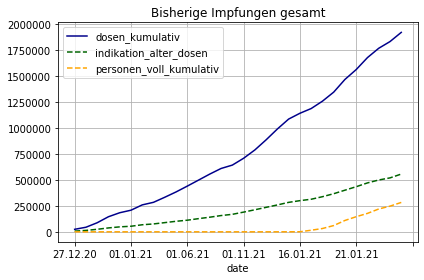

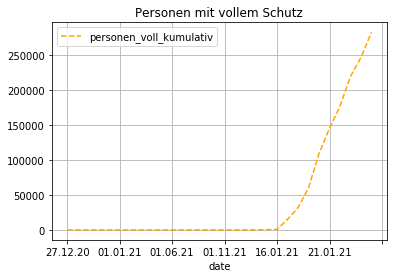

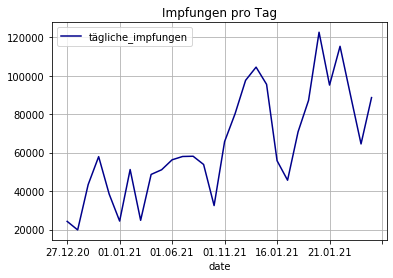

In [45]:
gruppe1 = 8000000 # 80 und älter
gruppe2 = 15630000 # 70 und älter
gruppe3 = 29340000 # 60 und älter
gruppe4 = 58216000 # Herdenimmunität als 70% der Gesamtbevölkerung

%matplotlib inline
ax=data.plot(kind="line", x="date", y="dosen_kumulativ", color="DarkBlue")
ax2=data.plot(kind="line", x="date", y="indikation_alter_dosen", linestyle="dashed", color="DarkGreen",ax=ax)
ax=data.plot(kind="line",x="date",y="personen_voll_kumulativ", linestyle="dashed", color="Orange",ax=ax)
#ax.set_ylabel("Impfungen kumulativ")
#ax2.set_ylabel("Tägliche Impfungen")
plt.title("Bisherige Impfungen gesamt")
plt.grid(True)
#plt.axhline(y=gruppe1, label="Gruppe 1")
plt.tight_layout()
plt.show()

ax=data.plot(kind="line",x="date",y="personen_voll_kumulativ", linestyle="dashed", color="Orange")
plt.title("Personen mit vollem Schutz")
plt.grid(True)
plt.show()

ax=data.plot(kind="line", x="date", y="tägliche_impfungen", color="DarkBlue")
plt.title("Impfungen pro Tag")
plt.grid(True)
plt.show()

#fig = plt.figure()
#ax1 = fig.add_axes([0,0,1,1])
#ax2 = fig.add_axes([1.2,0,1,1])
#ax1.grid(True)
#ax1.plot(data["date"], data["dosen_kumulativ"], color="DarkBlue", label="Kumulative Impfungen")
#fig.show()

In [46]:
from sklearn.linear_model import LinearRegression

xs = data["tage_seit_impfstart"]
ys = data["dosen_kumulativ"]

xsl = []
for x in xs:
    xsl.append([x])
print(xsl)

model = LinearRegression()
model.fit(xsl,ys)

[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29]]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
predicted = model.predict(xsl)

days_future = list(range(0,200))
fsl = []
for x in days_future:
    fsl.append([x])

future = model.predict(fsl)

### Prognosen über zukünftige Entwicklungen

#### Wichtiger Hinweis: 
Zahlen über Geimpfte werden als Dosen/2 berechnet, was aufgrund der verzögerten Zweitimpfung nicht ganz korrekt ist (für längere Zeithorizonte jedoch recht akkurat sein sollte)

In [48]:
#plt.plot(xs,ys)
#plt.plot(xs,predicted)
#plt.title("Lineare Regression: Impfungen")
#plt.show()

#prognose = []
#value = 0
#for i in future:
#    prognose.append(i/2)
#prognose = [i/2 for i in prognose]
#plt.plot(days_future, prognose)
#plt.title("Lineare Prognose: Geimpfte")
#plt.show()
#prognose_end = round(prognose[-1]/2)
#print("Geimpfte bis Juli 2020: " + str(f"{prognose_end:,d}"))
#prognose_end = round(prognose[-1])
#print("Benötigte Impfdosen bis Juli 2020: " + str(f"{prognose_end:,d}"))

##### Moving Average Prognose
Berechnung mittels des gleitenden Durchschnitts der täglichen Impfungen der letzten 7 Tage

 
Durchschnittliche Tagesimpfungen der letzten 7 Tage: 94722.0


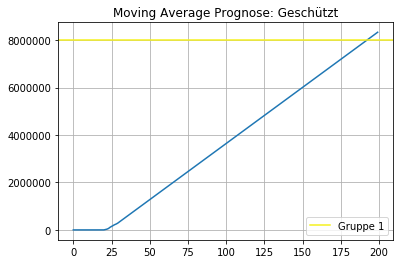

Geimpfte bis Juli 2020: 8,334,634
Benötigte Impfdosen bis Juli 2020: 16,669,268


In [49]:
rolling_mean = round(data["dosen_differenz_zum_vortag"].rolling(window=7).mean().iloc[-1],0)

print(" ")
print("Durchschnittliche Tagesimpfungen der letzten 7 Tage: " + str(rolling_mean))

prognose = list(data["personen_voll_kumulativ"])
while len(prognose) < 200:
    prognose.append(prognose[-1]+rolling_mean/2)
    
plt.plot(days_future, prognose)
plt.title("Moving Average Prognose: Geschützt")
plt.axhline(y=gruppe1, label="Gruppe 1", color="#f5f11d")
#plt.axhline(y=gruppe2, label="Gruppe 2", color="#f5bb1d")
#plt.axhline(y=gruppe3, label="Gruppe 3", color="DarkGreen")
plt.grid(True)
plt.legend()
plt.show()
prognose_end = round(prognose[-1])
print("Geimpfte bis Juli 2020: " + str(f"{prognose_end:,d}"))
prognose_end = round(prognose[-1])
print("Benötigte Impfdosen bis Juli 2020: " + str(f"{prognose_end*2:,d}"))

##### Manuelle Prognose

IntText(value=100000, description='Tägl. Impfungen')

Button(description='Simulieren', style=ButtonStyle())

200000


Prognose für 200000 tägliche Impfungen ab heute.


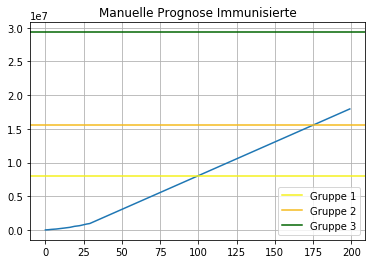

Geimpfte bis Juli 2020: 17,960,844
Benötigte Impfdosen bis Juli 2020: 35,921,689


300000


Prognose für 300000 tägliche Impfungen ab heute.


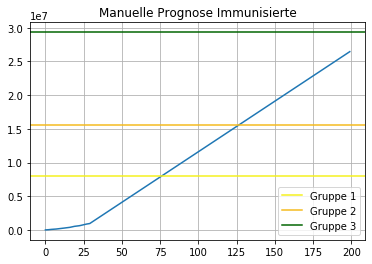

Geimpfte bis Juli 2020: 26,460,844
Benötigte Impfdosen bis Juli 2020: 52,921,689




In [50]:
import ipywidgets as widgets
from IPython.display import display

input = widgets.IntText(description="Tägl. Impfungen", value=100000)
display(input)

def klick(event):
    print(input.value)
    tägliche_impfungen_geschätzt = input.value

    prognose2 = list(data["dosen_kumulativ"])
    days_left = len(days_future) - len(days)
    days_future2 = list(range(0,days_left))
    value = prognose2[-1]
    for i in days_future2:
        value += tägliche_impfungen_geschätzt
        prognose2.append(value)
    prognose2 = [i/2 for i in prognose2]
    print("")
    print("")
    print("Prognose für " + str(input.value) + " tägliche Impfungen ab heute.")
    plt.plot(prognose2)
    plt.grid()
    plt.title("Manuelle Prognose Immunisierte")
    plt.axhline(y=gruppe1, label="Gruppe 1", color="#f5f11d")
    plt.axhline(y=gruppe2, label="Gruppe 2", color="#f5bb1d")
    plt.axhline(y=gruppe3, label="Gruppe 3", color="DarkGreen")
    plt.legend()
    plt.show()
    prognose_end = round(prognose2[-1])
    print("Geimpfte bis Juli 2020: " + str(f"{prognose_end:,d}"))
    prognose_end = round(prognose2[-1]*2)
    print("Benötigte Impfdosen bis Juli 2020: " + str(f"{prognose_end:,d}"))
    print("")
    print("")
    
button = widgets.Button(description="Simulieren")
display(button)
button.on_click(klick)